# Investigation Into the Most Significant Indicators of Heart Disease 

Baiya Griffiths - 26409599\
Grace Li - 62540075\
Andrew Wang - 91790451\
Zhaolan Wang - 70239009

<font size="5">**Introduction**</font>

In this project we are looking at Coronary artery disease, a common heart disease where the major blood vessels are clogged or narrowed. Due to the blockage it is difficult to transfer oxygen, blood and nutrients to the heart. Usually this disease can be attributed to cholesterol deposits, so the level of cholesterol in potential victims is of interest to us. The symptoms of coronary artery disease are often reflected in the type of chest pain, resting blood pressure, max heart rate and so on.

Question: Based on a limited set of test data, is a person at risk for coronary heart disease?
We will aim to identify an easily attainable set of variables that lead to an accurate prediction of heart disease. This could be used as an initial screening to determine risk of heart disease and prioritise additional testing to people at higher risk. We are going to take the data with different variables to train, test, and find the accuracy to determine which set of variables can be used for effective screening. 

The dataset we chose was the one about heart disease. The database for heart disease contains 76 attributes (variables), but the dataset we are using includes only 14 of them. In our project, we will focus on determining the presence or absence of heart disease, so the data in the disease column has only two categories, 0 (no heart disease) and 1 (with heart disease). Also, this database has four regional datasets, and we finally chose the Hungarian regional. 

<font size="5">**Methods & Results**</font>

This investigation used the variables chest pain type, resting blood pressure, cholesterol, resting electrocardiographic results, max heart rate as predictors, and the presence of heart disease as a target.

These five predictors were chosen because coronary artery disease can be mainly attributed to cholesterol deposition and coronary artery disease is mainly a blockage or narrowing of blood vessels, which can affect resting blood pressure, heart rate and is accompanied by varying degrees of chest pain. And the data of chest pain type, resting blood pressure, resting electrocardiographic results, max heart rate, and heart rate reflect the above factors, so we chose these five factors as predictors. 


In our data analysis, we will use the k-nearest neighbor method and the five predictors mentioned in the above section. The value of k will not be chosen arbitrarily, rather, we will use cross-validation to adjust our classifier to ensure that the most accurate value for k is used. The five predictors we use were chosen based on research into the primary causes of heart disease. Two are categorical and three are numerical. All predictors will be standardized.

Our k-nearest neighbor model predicts whether a person has heart disease based on the test set and determines the accuracy of the prediction as part of the visualization of our results: a visualization of the confusion matrix of the classifier. This will indicate the percentage of errors made by our classifier. Since we chose 5 predictors, it was difficult for us to visualize the test set (presented as a scatter plot).


<font size="4">**Code analysis**</font> 

In [1]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
library(tidymodels)
require(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#First step is to read the data and label the column names.
set.seed(1234)
heart_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data",col_name = FALSE)
colnames(heart_data) <- c("age", "sex", "chest_pain", "resting_bp", "cholesterol", "fbs>120mg/dL", "restingecg", "max_heart_rate", "exercise_induced_angina", "oldpeak", "slope", "ca", "thal", "disease")

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Here we are tidying the data by selecting predictors and target, and filtering out columns with "?" and converting all predictor variables to numeric types and target (disease) to a factor

In [3]:
heart_data_tidy <- heart_data |> select(chest_pain, resting_bp, cholesterol, restingecg, max_heart_rate, disease) |>
                   filter(chest_pain!= "?", resting_bp!= "?", cholesterol!= "?", restingecg!= "?", max_heart_rate!= "?", disease!= "?") |>
                   mutate(chest_pain = as.numeric(chest_pain), 
                          resting_bp = as.numeric(resting_bp),
                          cholesterol = as.numeric(cholesterol),
                          restingecg = as.numeric(restingecg),
                          max_heart_rate = as.numeric(max_heart_rate),
                          disease = as_factor(disease)) 

We divided the dataset into a training set and a test set. 75% of the data was selected as the training set and only this data was used in training the model, while the remaining 25% of the data will be used to determine the accuracy of the model.

In [4]:
heart_split <- initial_split(heart_data_tidy, prop = .75, strata = disease)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)
print("Table 1: training data") 
heart_train

[1] "Table 1: training data"


chest_pain,resting_bp,cholesterol,restingecg,max_heart_rate,disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,120,243,0,160,0
1,170,237,1,170,0
2,100,219,1,150,0
⋮,⋮,⋮,⋮,⋮,⋮
3,130,294,1,100,1
2,180,393,0,110,1
4,130,275,1,115,1


Preliminary exploratory data analysis; missing values were ommited so there are zero rows with missing values. Finding mean of all numerical predictors

In [5]:
heart_data_miss_num <- heart_train |>
                       map_df(is.na) |>
                       map_df(sum)
print("Table 2: Number of Rows with Missing Data for each type of data")
heart_data_miss_num

heart_data_obs_num <- heart_train |>
                      summarize(n_cp=n(),n_rbp=n(),n_cholesterol=n(),n_max_heart_rate=n(),n_disease=n())
print("Table 3: Number of rows without missing data in each column")
heart_data_obs_num

heart_data_mean <- heart_train |>
    select(resting_bp, cholesterol, max_heart_rate) |>
    map_dfr(mean)
print("Table 4: Mean value for each type of data")
heart_data_mean

#Finding number of observations for each class
heart_num_class <- heart_train |>
    group_by(disease) |>
    summarize(n=n())
print("Table 5: number of observations for each class")
heart_num_class

[1] "Table 2: Number of Rows with Missing Data for each type of data"


chest_pain,resting_bp,cholesterol,restingecg,max_heart_rate,disease
<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0


[1] "Table 3: Number of rows without missing data in each column"


n_cp,n_rbp,n_cholesterol,n_max_heart_rate,n_disease
<int>,<int>,<int>,<int>,<int>
201,201,201,201,201


[1] "Table 4: Mean value for each type of data"


resting_bp,cholesterol,max_heart_rate
<dbl>,<dbl>,<dbl>
130.1642,248.8159,139.194


[1] "Table 5: number of observations for each class"


disease,n
<fct>,<int>
0,126
1,75


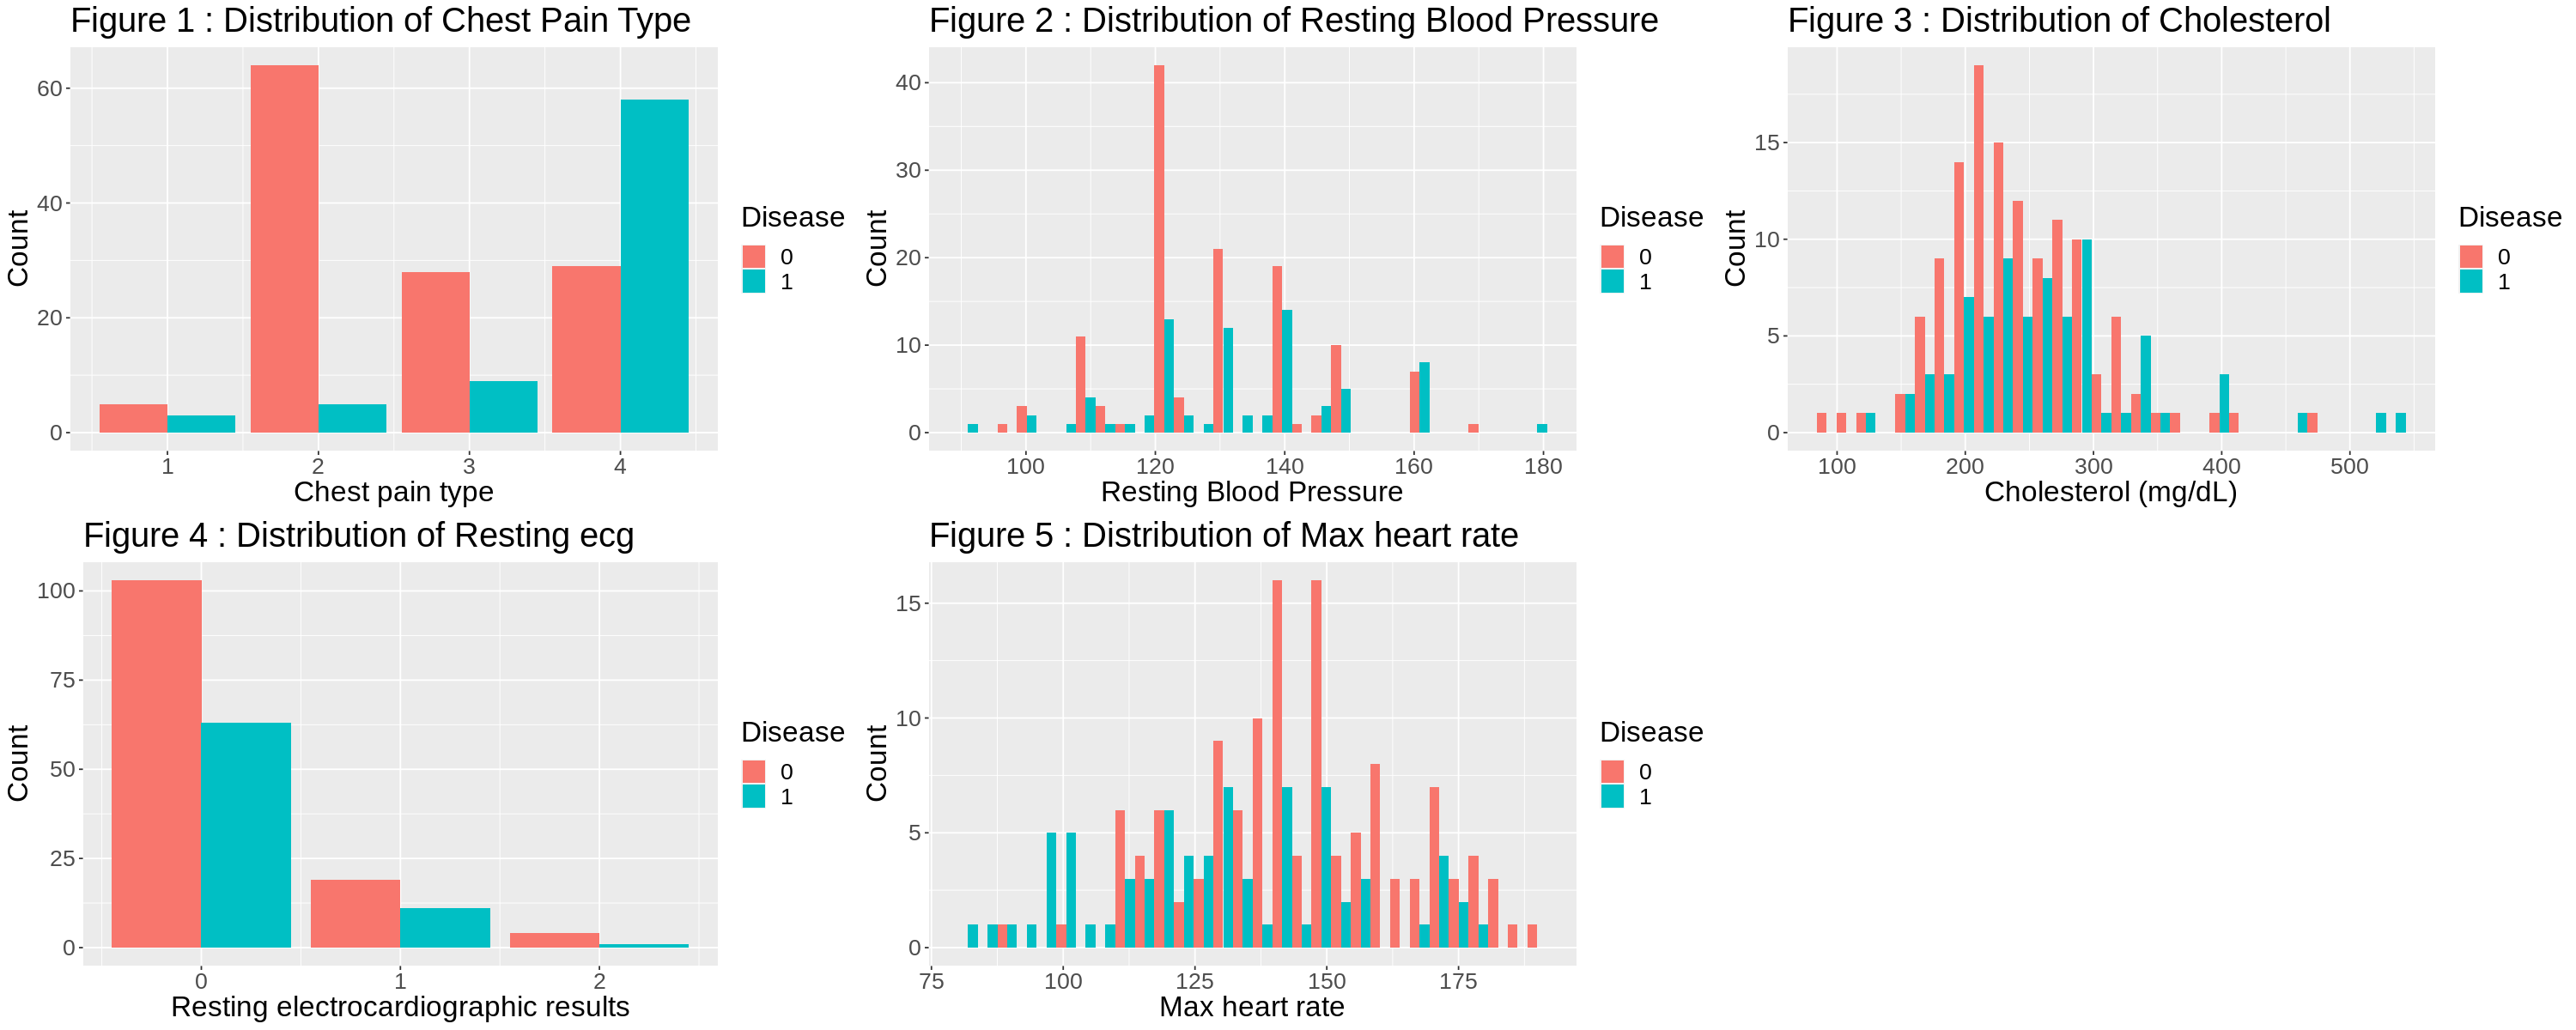

In [6]:
#Preliminary exploratory data analysis; visualization of predictor distribution
options(repr.plot.height = 10, repr.plot.width = 25)
chest_pain_plot <- ggplot(heart_train , 
                   aes(x = chest_pain, fill = disease)) +
                   geom_bar(position= "dodge") +
                   labs(x = "Chest pain type", y = "Count",  fill = "Disease") +
                   ggtitle("Figure 1 : Distribution of Chest Pain Type") +
                   theme(text = element_text(size = 20))
restingbp_plot <- ggplot(heart_train , 
                   aes(x = resting_bp, fill = disease)) +
                   geom_histogram(position= "dodge", bins=30) +
                   labs(x = "Resting Blood Pressure", y = "Count",  fill = "Disease") +
                   ggtitle("Figure 2 : Distribution of Resting Blood Pressure") +
                   theme(text = element_text(size = 20))
chol_plot <- ggplot(heart_train , 
                   aes(x = cholesterol, fill = disease)) +
                   geom_histogram(position= "dodge", bins=30) +
                   labs(x = "Cholesterol (mg/dL)", y = "Count",  fill = "Disease") +
                   ggtitle("Figure 3 : Distribution of Cholesterol") +
                   theme(text = element_text(size = 20))
restingecg_plot <- ggplot(heart_train , 
                   aes(x = restingecg, fill = disease)) +
                   geom_bar(position= "dodge") +
                   labs(x = "Resting electrocardiographic results", y = "Count",  fill = "Disease") +
                   ggtitle("Figure 4 : Distribution of Resting ecg") +
                   theme(text = element_text(size = 20))
max_heart_rate_plot <- ggplot(heart_train , 
                   aes(x = max_heart_rate, fill = disease)) +
                   geom_histogram(position= "dodge", bins=30) +
                   labs(x = "Max heart rate", y = "Count",  fill = "Disease") +
                   ggtitle("Figure 5 : Distribution of Max heart rate") +
                   theme(text = element_text(size = 20))
grid.arrange(chest_pain_plot, restingbp_plot, chol_plot, restingecg_plot, max_heart_rate_plot ,nrow=2)

In the recipe, disease was used as the target variable, Chest Pain Type, Resting Blood Pressure, Cholesterol, Resting electrocardiographic results, and Max heart rate were used as predictors, and the predictors were scaled and centered for better use of the data for analysis.

We specified the model as a k-nn classification, set neighbour to tune, and allow multiple k values to be tested (from 1 to 70, every fifth k value is tested).

In [7]:
# training the classifier 
set.seed(1234)

# creating a recipe

heart_recipe <- recipe(disease ~., data = heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# creating a model

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

We use cross-validation to select the k-value that maximizes the prediction accuracy, and we choose five-fold cross-validation by randomly dividing the training data into five uniformly sized subsets, four of which are used as training sets and one for validation, and this process is repeated five times to derive the accuracy of each specified k-value, which is then compared to select the k-value.

From values 1 to 70, every fifth k value is tested. Choosing every fifth k-value to be tested both allows the general trend in the accuracy of the k-values to be determined and is not too time-consuming.

We created a workflow combining the recipe, model specification, tuning and collected the metrics. The tune_grid function determines the accuracy and the collect_metrics function aggregates these values.

In [8]:
# cross-validation

heart_vfold <- vfold_cv(heart_train, v = 5, strata = disease)

# create tibble with possible k-values

k_vals <- tibble(neighbors = seq(from = 1, to = 70, by = 5))

# training a workflow

knn_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_tune) |>
  tune_grid(resamples = heart_vfold, grid = k_vals) |>
  collect_metrics()

In [9]:
# The mean is the estimated accuracy and the standard error is a measure of the uncertainty around the mean.
set.seed(1234)

accuracies <- knn_fit |> 
    filter(.metric == "accuracy")
print("Table 6: Accuracy metrics in ascending order of different K values")
accuracies

[1] "Table 6: Accuracy metrics in ascending order of different K values"


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7067073,5,0.02331231,Preprocessor1_Model01
6,accuracy,binary,0.7662195,5,0.02301827,Preprocessor1_Model02
11,accuracy,binary,0.7162195,5,0.02231207,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,accuracy,binary,0.7565854,5,0.03393521,Preprocessor1_Model12
61,accuracy,binary,0.7265854,5,0.02000948,Preprocessor1_Model13
66,accuracy,binary,0.7017073,5,0.02996218,Preprocessor1_Model14


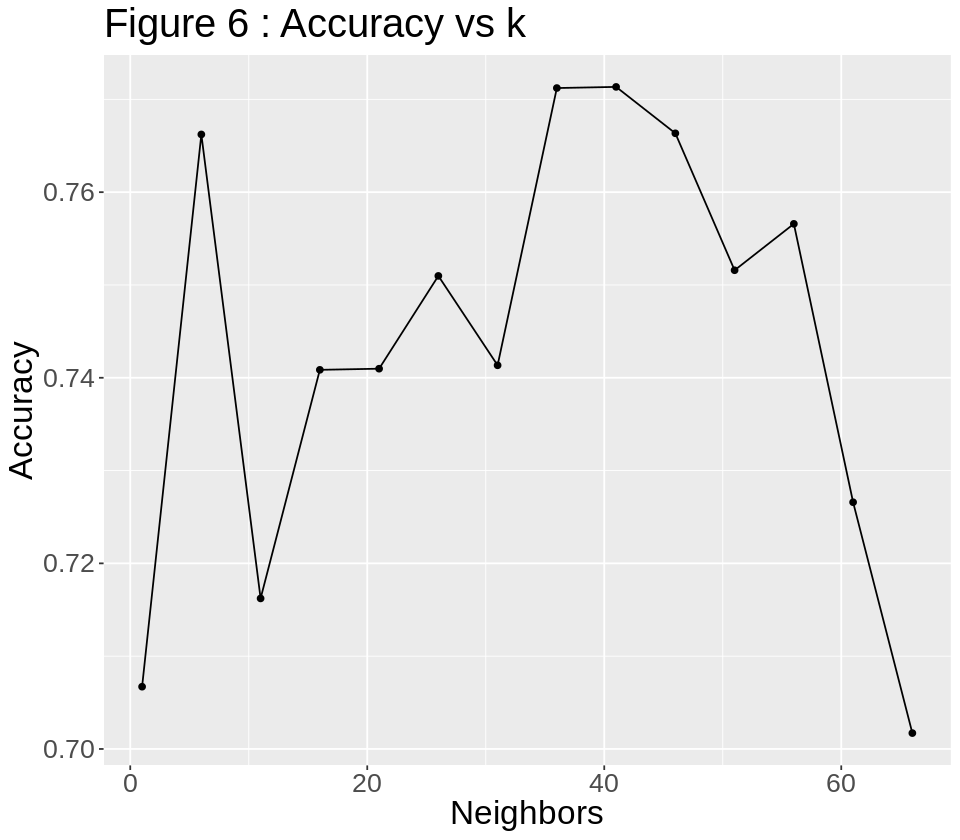

In [54]:
# To better select the k-values, we visualize the change in the accuracy of the k-values for the training set and cross-validation.


options(repr.plot.width = 8, repr.plot.height = 7)
best_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy") +
    ggtitle("Figure 6 : Accuracy vs k") +
    theme(text = element_text(size = 20))
best_k

From the above graph, we can see that the best k-value is around 37 to 40. For this project, we will use k=38.

In [46]:
# make a new model with k=38


knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 38) |>
  set_engine("kknn") |>
  set_mode("classification")

# make a new workflow using the new model
knn_best_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  fit(data = heart_train)

knn_best_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(38,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2636816
Best kernel: rectangular
Best k: 38

In [55]:
# determine the accuracy of our model using testing data

heart_test_predictions <- predict(knn_best_fit, heart_test) |>
  bind_cols(heart_test) 
print("Table 7: Table combining predicted and true values")
heart_test_predictions

heart_model_accuracy <- heart_test_predictions |>
  metrics (truth = disease, estimate = .pred_class) |>
  filter(.metric == "accuracy")
print("Table 8:  Prediction Accuracy for K-nn classification with 38 Neighbours")
heart_model_accuracy

confusion <- heart_test_predictions |>
             conf_mat(truth = disease, estimate = .pred_class)
print("Table 9:  Confusion Matrix for K-nn classification with 38 Neighbours")
confusion

[1] "Table 7: Table combining predicted and true values"


.pred_class,chest_pain,resting_bp,cholesterol,restingecg,max_heart_rate,disease
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,2,130,132,2,185,0
0,2,105,198,0,165,0
0,2,125,254,0,155,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,4,135,491,0,135,1
1,4,160,331,0,94,1
0,4,155,342,0,150,1


[1] "Table 8:  Prediction Accuracy for K-nn classification with 38 Neighbours"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7794118


[1] "Table 9:  Confusion Matrix for K-nn classification with 38 Neighbours"


          Truth
Prediction  0  1
         0 35  7
         1  8 18

<font size="5">**Discussion**</font>

<font size="3">**Summary of findings**</font> 

The k-nn classification model chosen in this project selected 38 neighbors and the model obtained an accuracy of about 78% (Table 8) and from Table 9 it can be concluded that the accuracy of this model was about 81% (35/43)for the prediction of those who did not have heart disease and about 72% (18/25) for those who had heart disease. The difference in accuracy between the two types is not very large, which means that we get more false positives rather than false negatives. It is better that we are getting false positives rather than negatives when we're testing for a disease, because it means the consequences of our mistakes is less severe. 

<font size="3">**Is it the desired result?**</font> 

Based on our chosen predictors for this project, we expected to find the most accurate classifier. After creating our model, we’ve come to the conclusion that our model is not as accurate as we thought it would be. We expected to see higher accuracy percentages as the predictors we chose were tests that seemed to be the most determinate when it came to concluding whether or not a patient has coronary artery disease or not. The mean accuracy for our predictors was around 74%, which is not as high as we expected. Based on this accuracy, we determined that our test would be more impactful as a preliminary screening, rather than a final determining factor as to whether or not a patient has heart disease. 


<font size="3">**Impact of discovery**</font> 

Since our model’s accuracy is significantly above 50%  (around 78%), we can infer that the predictors it uses are linked to heart disease. Although the model itself is perhaps not reliable enough to be used in a real-life scenario outside of preliminary testing, it could lead to other investigations into the correlation between certain factors with heart disease. Additionally, the fact that the predictors are in some way correlated with heart disease may incentivize people to change their lifestyle if it puts them at risk of heart disease. For example, a person who finds they have unusually high cholesterol levels might reduce their consumption of saturated fat. This allows individuals to take precaution and help motivate them to have a healthy lifestyle in order to prevent heart disease, or other illnesses, in the future.

Even when the model was using predictors that are commonly considered as risk factors for heart disease, it was still unable to make highly accurate predictions. This may suggest that heart disease is extremely complex in nature and is difficult to diagnose without other tools such as X-ray scans.


<font size="3">**Future question**</font> 

This could lead to a few different paths of exploration: 
It would be interesting to see if we could improve the accuracy of our screening. Could the addition or removal of certain predictors lead to a screening with a higher accuracy? 
Could a preliminary screening be developed that would allow people to assess at home by the patient? This would require us to remove all predictors that require specialized equipment/tests (i.e. ECG, blood tests, etc.). If this could be developed with a high enough accuracy it would allow people to evaluate themselves before needing to see a doctor and receive further testing. 

Since our data has only been used to predict a binary outcome (presence of heart disease or not), it would be interesting to investigate differences in the severity of heart disease. If we could create a screening that provided us with this information it would allow us to prioritize time and resources to higher risk individuals.  

Since our data was based on a Hungarian population, how does this compare to data from other parts of the world? It would be good to analyze differences in groups of people. As well as ethnic differences, we could evaluate the effect an individual's sex has on their risk if any. 


<font size="5">**References**</font>

Mayo Foundation for Medical Education and Research. Coronary artery disease - Symptoms and causes. (2022, May 25). Mayo Clinic. Retrieved November 30, 2022, from https://mayoclinic.org/diseases-conditions/coronary-artery-disease/symptoms-causes/syc-20350613

National Health Service. Coronary heart disease - Causes. (2018, October 3). nhs.uk. Retrieved November 30, 2022, from https://www.nhs.uk/conditions/coronary-heart-disease/causes/

Mayo Foundation for Medical Education and Research. (2022, September 2). Can lifestyle changes benefit your cholesterol? Mayo Clinic. Retrieved November 30, 2022, from https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/in-depth/reduce-cholesterol/art-20045935
